# Sentimental Analysis on Elon Musk's tweets

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sohai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sohai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [2]:
tweet= pd.read_csv("Elon_musk.csv",encoding='cp1252',error_bad_lines=False)
tweet

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
txt = [i.strip() for i in tweet.Text]

In [4]:
string=" ".join(txt)

In [5]:
string

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [6]:
from nltk import tokenize

In [7]:
sentence= tokenize.sent_tokenize(string)

In [8]:
df= pd.DataFrame(sentence,columns=['sentence'])

In [9]:
df.head(40)

,sentence
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
5,Happy New Year of the Ox!
6,https://t.co/9WFKMYu2oj Frodo was the underdog...
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...
8,Tweets definitely do not represent real-world ...
9,The most entertaining outcome is the most like...


In [10]:
afinn= pd.read_csv("Afinn.csv",encoding='cp1252')

In [11]:
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [12]:
affinity_score=afinn.set_index('word')['value'].to_dict()

In [13]:
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [14]:
import en_core_web_sm

In [15]:
nlp = en_core_web_sm.load()

In [16]:
affinity_lexicons= affinity_score

In [17]:
#Defining a function to perform the sentiment analysis on the given data

def sentiment_analysis(text: str=None):
    sent_score=0
    
    if text:
        sentence= nlp(text)
        for word in sentence:
            sent_score += affinity_lexicons.get(word.lemma_,0)
            
    return sent_score

In [18]:
#applying the defined funtion to the dataframe formed after assigning the lexicon values

df['sentence_value']= df['sentence'].apply(sentiment_analysis)

In [19]:
df

,sentence,sentence_value
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0
910,"It may never pay out, as the stock can’t b… ht...",-4
911,Details Aug 28.,0
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [20]:
# finding the word count in every document in the corpus

df['word count']=df['sentence'].str.split().apply(len)
df

,sentence,sentence_value,word count
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11
910,"It may never pay out, as the stock can’t b… ht...",-4,31
911,Details Aug 28.,0,3
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [21]:
df.sort_values(by='sentence_value').head(50)

,sentence,sentence_value,word count
640,Very ba… https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
828,Cool Model 3 review by @iamjamiefoxx https://t...,-6,61
473,"He plays the “poor inventor” card, but was ric...",-5,34
910,"It may never pay out, as the stock can’t b… ht...",-4,31
672,"Occasional flights from land are ok, but frequ...",-4,39
604,"Then static fire, checkouts, static fire, fly ...",-4,12
534,We are prioritizing emergency responders &amp;...,-3,13
214,RT @boringcompany: Tunnel Rave https://t.co/d3...,-3,129
623,You are a modern day moron.,-3,6


In [22]:
df[df['sentence_value']<=0]

,sentence,sentence_value,word count
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
8,Tweets definitely do not represent real-world ...,0,8
...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11
910,"It may never pay out, as the stock can’t b… ht...",-4,31
911,Details Aug 28.,0,3
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [23]:
df[df['sentence_value']>10]

,sentence,sentence_value,word count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
80,@teslaownersSV This is a good one @MrBeastYT I...,13,38
104,@Erdayastronaut @SpaceX Was also thinking that...,16,94
182,"Also, w… https://t.co/IYdKttVsqk @cleantechnic...",12,99
222,"@PPathole @karpathy For a second there, I thou...",11,69
578,The “open” areas… https://t.co/rabjKrtQlw @Sav...,14,138
638,It’s… https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
710,We just haven’t observed the… https://t.co/mez...,15,72
808,Might be able to… https://t.co/FB7e5nOq2E @Pri...,11,72


C:\Users\sohai\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentence_value', ylabel='Density'>

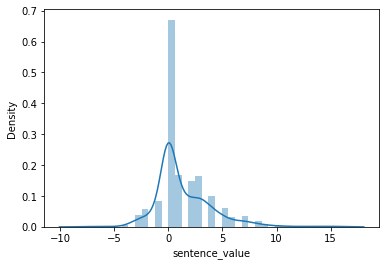

In [24]:
sns.distplot(df['sentence_value'])

In [25]:
df['index']= df.index

<AxesSubplot:xlabel='index', ylabel='sentence_value'>

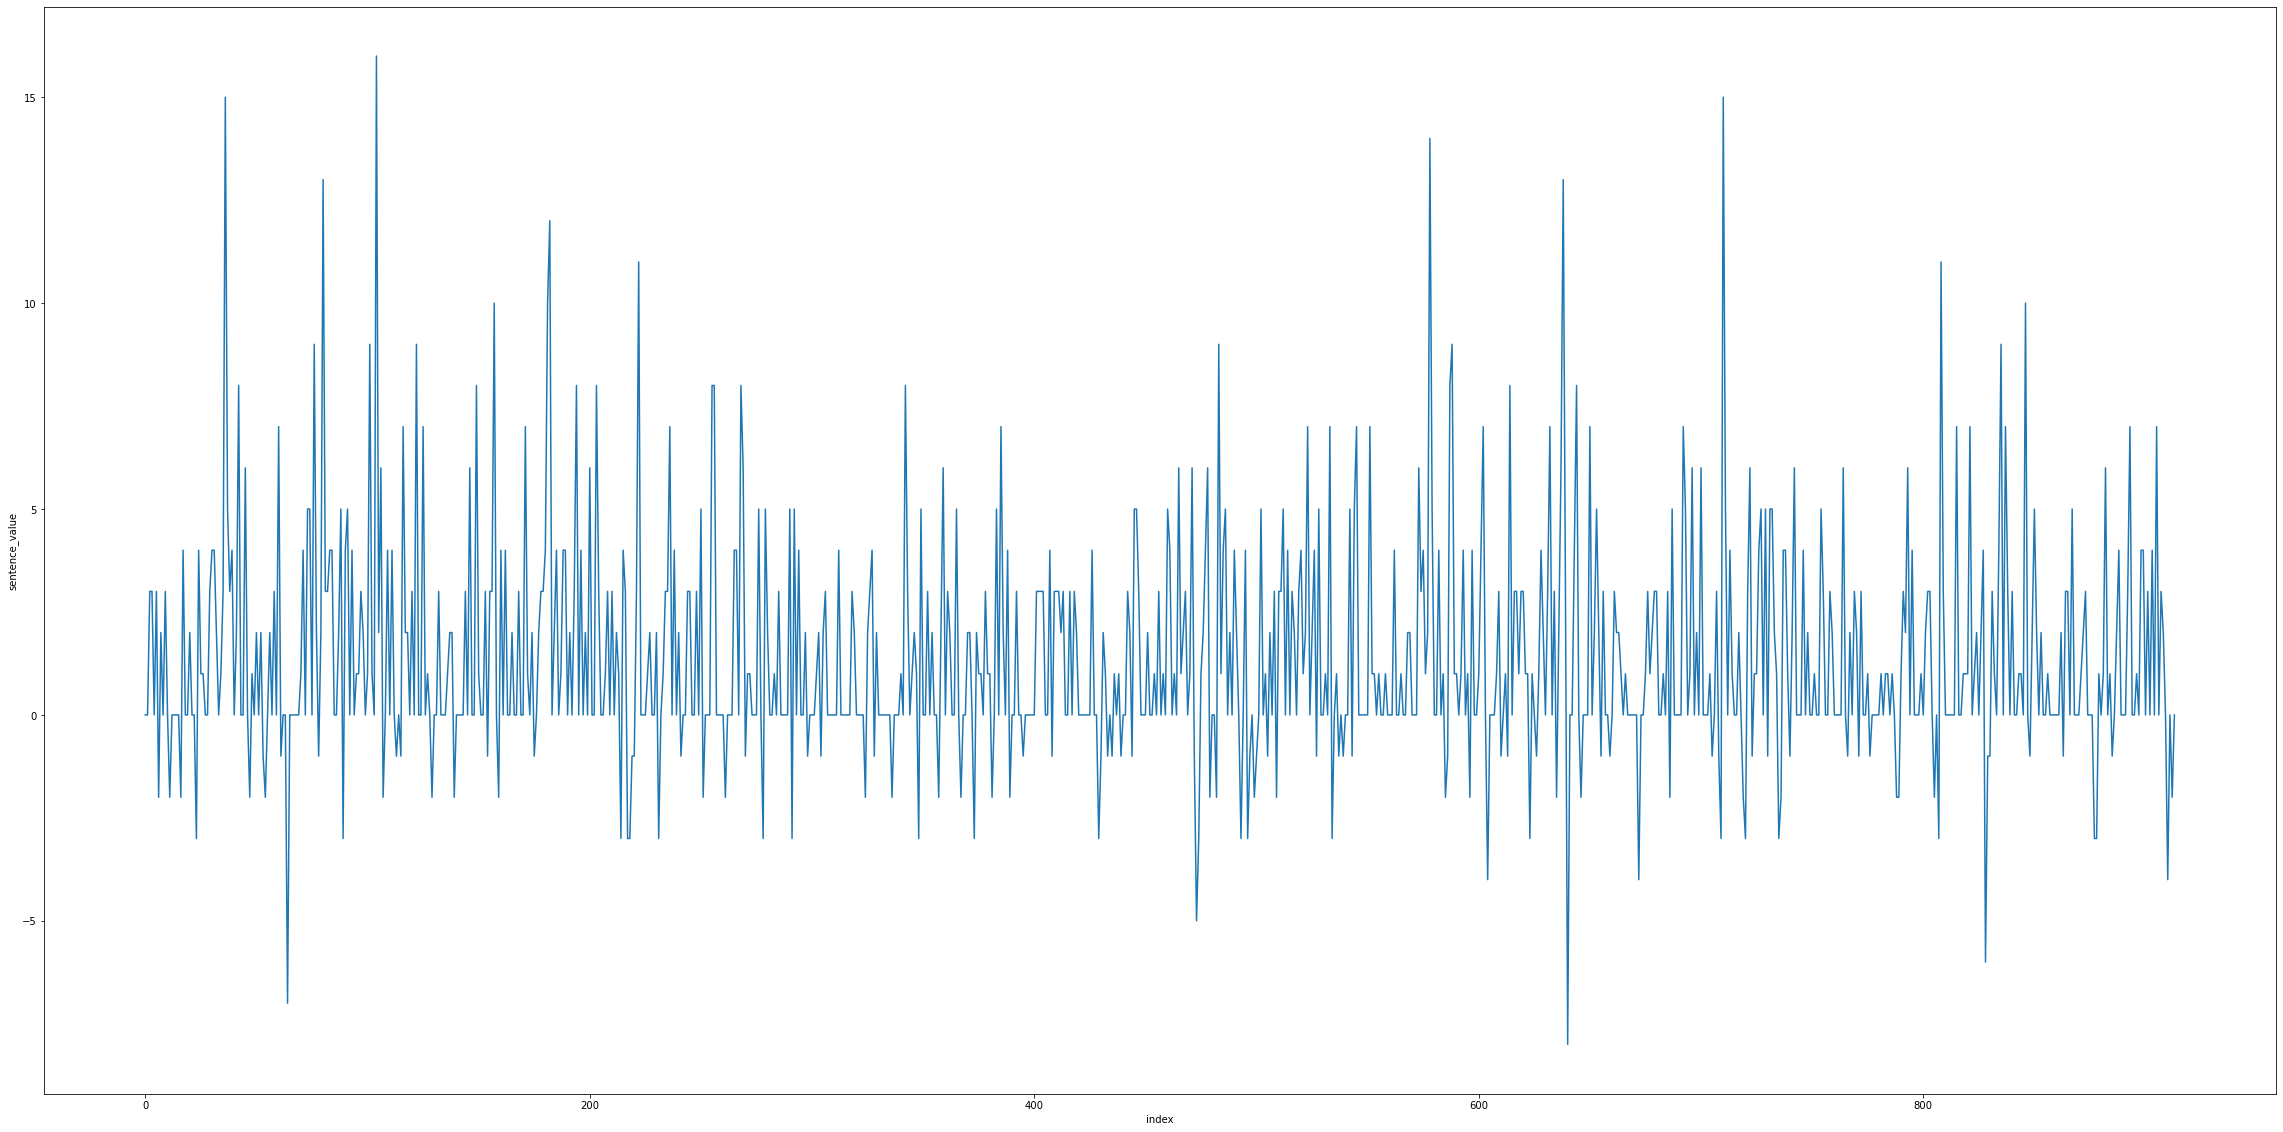

In [26]:
plt.figure(figsize=[40,20])
sns.lineplot(y='sentence_value', x='index', data= df)

<AxesSubplot:title={'center':'Sentiment Analysis on Elon Musk tweets'}, xlabel='word count', ylabel='sentence_value'>

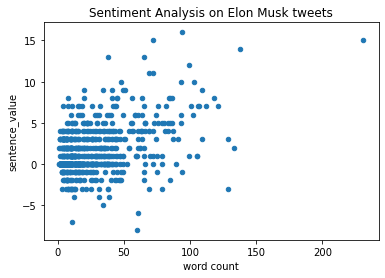

In [27]:
df.plot.scatter(y='sentence_value', x= 'word count',title='Sentiment Analysis on Elon Musk tweets')

# Sentiment Analysis on a Review of a product 

In [28]:
import requests 
from bs4 import BeautifulSoup as bs
import re

In [29]:
from wordcloud import WordCloud

In [30]:
redmi_reviews = []

In [31]:
for i in range (1,31):
    ip=[]
    url ="https://www.amazon.in/Redmi-Pro-Blue-64GB-Storage/product-reviews/B07DJHR5DY/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    redmi_reviews = redmi_reviews+ip

In [32]:
red_rev_string = " ".join(redmi_reviews)

In [33]:
from nltk.tokenize import sent_tokenize    
tokenize_sent = sent_tokenize(red_rev_string)

In [34]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [35]:
a = stopwords.words('english')
wordnet = WordNetLemmatizer()

In [38]:
filtered_split=[]
for i in range(len(tokenize_sent)):
    review = re.sub("[^A-Za-z" "]+"," ",tokenize_sent[i])
    review = re.sub("[0-9" "]+"," ",tokenize_sent[i])
    review =review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    filtered_split.append(review)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf= tf.fit_transform(filtered_split)
feature_names =  tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = feature_names)

In [40]:
cloud = ",".join(df)

In [41]:
wordcloud= WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(cloud)

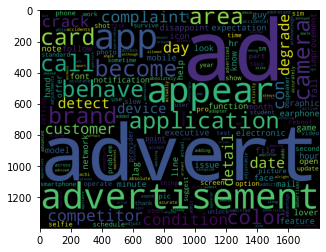

In [42]:
plt.imshow(wordcloud)

In [43]:
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

In [44]:
poswords = poswords[36:]

In [45]:
red_pos = ' '.join([w for w in df if w in poswords])

In [46]:
wordcloud_pos = WordCloud(
                           background_color = 'black',
                           width =1800,
                           height =1400
                           ).generate(red_pos)

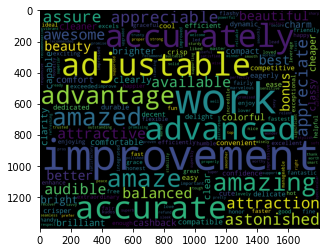

In [47]:
plt.imshow(wordcloud_pos)

In [48]:
with open("negative-words.txt","r") as nos:
    negwords = nos.read().split("\n")

In [49]:
negwords =negwords[37:]

In [50]:
red_neg =' '.join([w for w in df if w in negwords])

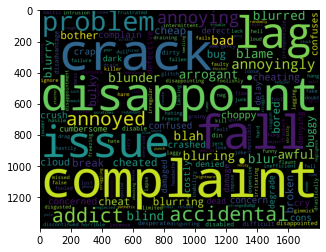

In [51]:
wordcloud_neg = WordCloud(
        background_color = 'black',
        width = 1800,
        height = 1400
        ).generate(red_neg)
plt.imshow(wordcloud_neg)